In [5]:
#pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [1]:
#  csv 파일 읽기
import pandas as pd

charger = pd.read_csv('충전소 리스트.csv')

charger.head()

# https://tago.kr/charge/address.htm _data source

,번호,충전소명,충전소ID,충전기ID,충전기타입,소재지 도로명 주소,위도,경도,이용가능시간,기관ID,운영기관명,관리업체 전화번호,충전기상태,상태갱신일시,충전기용량,지역코드,주차료무료 여부,충전소 안내
0,1,종묘 공영주차장,ME000001,1.0,-,"서울특별시 종로구 종로 157, 지하주차장 4층 하층 T구역",37.571076,126.995880,24시간 이용가능,ME,환경부,1661-9408,사용가능,20210125092335,급속(50kW),11,무료,NaN
1,2,세종로 공영주차장,ME000002,1.0,급속,"서울특별시 종로구 세종대로 189, 지하주차장 4층 D구역 계단실 앞",37.573611,126.976011,24시간 이용가능,ME,환경부,1661-9408,사용불가,20210112085004,급속(50kW),11,무료,NaN
2,3,그랜드앰배서더 서울,ME000003,1.0,급속,"서울특별시 중구 동호로 287, 대형버스주차장",37.559352,127.002350,24시간 이용가능,ME,환경부,1661-9408,사용불가,20210125083831,급속(50kW),11,무료,NaN
3,4,한강진역 공영주차장,ME000004,1.0,-,"서울특별시 용산구 한남동 산10-84, 지상실외주차장",37.540085,127.002804,24시간 이용가능,ME,환경부,1661-9408,사용불가,20210125072342,급속(50kW),11,무료,NaN
4,5,마장동사무소 앞(공중전화부스),ME000006,1.0,급속,서울특별시 성동구 마장동 808,37.566094,127.045526,24시간 이용가능,ME,환경부,1661-9408,사용가능,20210125085901,급속(50kW),11,무료,NaN


In [4]:
type(charger)

pandas.core.frame.DataFrame

In [10]:
#운영기관명 조회
op_name = set(charger['운영기관명'])
print(op_name)

#enhancing readability using 'enumerate'
for idx, name in enumerate(op_name, 1):
    print(f"{idx}. {name}")

{'(주)차지인', '(주)클린일렉스', '구덕주유소', '보타리에너지', '삼성이브이씨', '대영채비', '대영채비㈜', '종하아이앤씨', '정읍시', '케이씨씨 중앙연구소', '한국전기공사협회', '오크밸리', '운영시스템', '에스트래픽', 'DIC주유소', 'GS칼텍스', '대구환경공단', '나전주유소', '환경부', '한국컴퓨터', '기타시설', '보타리에너지(주)', '에버온', '(주)스타코프', 'evPlug(타디스테크놀로지)', '차지비', '수영강변주유소', '한국전기차충전서비스(주)', '제주전기자동차서비스', '씨어스', '제주특별자치도', '한국전력', '백양로주유소', '대영채비(주)', '가야주유소', '클린일렉스', '이카플러그', '제주테크노파크', '익산시', '파워큐브', '금정주유소', '대원주유소', '지엔텔', '(주)삼성이브이씨', '한국환경공단', '가야로주유소', '스타코프', '케이티', '타디스테크놀로지', '건국대학교', '(주)제주전기자동차서비스', '에스트래픽(주)', '삼척시', '군포시', '빛가람중학교', '광장주유소', '광주시', 'KP', '전주시', '주식회사에버온', '한국전기차인프라기술', '제인모터스', 'SK에너지', '구평주유소', '이지차저', '제주에너지공사', '부산신항주유소', '타디스테크놀로지(evPlug)', '한국전기차충전서비스', '한국전력공사 강릉지사', '그린주유소', '주식회사 에버온', 'evplug(타디스테크놀로지', '금강주유소', '대영채비주(주)', '덕천고속주유소', nan, 'KT', '부안군', '시그넷', '포스코ICT', '매니지온', '제주도청', 'LG헬로비전', 'evmost', '한국전력공사', '이카플럭', 'evplug(타디스테크놀로지)', '서울시', 'evPlug', '나주시'}
1. (주)차지인
2. (주)클린일렉스
3. 구덕주유소
4. 보타리에너지
5. 삼성이브이씨
6. 대영채비
7. 대영채비㈜
8. 종하아이앤씨
9. 정읍시
10.

In [13]:
# data merge '기관 ID 기준'

# import pandas as pd

# op_name = pd.read_csv('충전소리스트')
# df2 = pd.read_csv('file2.csv')

# # '기관ID'를 기준으로 병합 (inner join을 기본으로 설정)
# ev_merged = pd.merge(op_name, df2, on='기관ID', how='inner')

# print(ev_merged)


import pandas as pd

# CSV 파일 불러오기
f1 = pd.read_csv('충전소 리스트.csv')  # 충전기관 위치, 이름 파일
f2 = pd.read_csv('기관별_전기차충전가격.csv')  # 충전기관 가격, 이름 파일

# '운영기관명'을 기준으로 병합 (left join 사용)
merged_file = pd.merge(f1, f2[['운영기관명', '비회원가', '회원가']], on='운영기관명', how='left')

# 병합된 데이터프레임 확인
print(merged_file)

# 병합된 파일을 저장하고 싶다면 CSV로 저장 가능
merged_file.to_csv('EV_merged.csv', index=False)


          번호        충전소명     충전소ID  충전기ID 충전기타입  \
0          1    종묘 공영주차장  ME000001    1.0     -   
1          1    종묘 공영주차장  ME000001    1.0     -   
2          2   세종로 공영주차장  ME000002    1.0    급속   
3          2   세종로 공영주차장  ME000002    1.0    급속   
4          3  그랜드앰배서더 서울  ME000003    1.0    급속   
...      ...         ...       ...    ...   ...   
23901  16762  언양읍 행정복지센터  US200420    1.0     -   
23902  16762  언양읍 행정복지센터  US200420    1.0     -   
23903  16763  화봉공원 공영주차장  US200421    1.0     -   
23904  16763  화봉공원 공영주차장  US200421    1.0     -   
23905  16764        test       NaN    NaN     -   

                                   소재지 도로명 주소         위도          경도  \
0           서울특별시 종로구 종로 157, 지하주차장 4층 하층 T구역  37.571076  126.995880   
1           서울특별시 종로구 종로 157, 지하주차장 4층 하층 T구역  37.571076  126.995880   
2      서울특별시 종로구 세종대로 189, 지하주차장 4층 D구역 계단실 앞  37.573611  126.976011   
3      서울특별시 종로구 세종대로 189, 지하주차장 4층 D구역 계단실 앞  37.573611  126.976011   
4                   서울특별시 중

In [12]:
op_name2 = set(merged_file['운영기관명'])
print(op_name2)

#enhancing readability using 'enumerate'
for idx, name in enumerate(op_name2, 1):
    print(f"{idx}. {name}")

{'전주시', '에스트래픽(주)', '기타시설', '한국전력공사', '가야로주유소', '삼성이브이씨', '금정주유소', '대영채비', nan, '제주에너지공사', '그린주유소', '씨어스', 'evplug(타디스테크놀로지', '(주)차지인', '익산시', '한국전기차충전서비스(주)', '광주시', '광장주유소', '타디스테크놀로지', '타디스테크놀로지(evPlug)', '(주)스타코프', '종하아이앤씨', '(주)클린일렉스', '한국컴퓨터', '한국전기차충전서비스', '이카플럭', '부안군', '삼척시', '대영채비㈜', '차지비', '한국환경공단', '제주특별자치도', '제인모터스', '구평주유소', 'evPlug', '덕천고속주유소', '나전주유소', '한국전기차인프라기술', '한국전력', '이카플러그', '빛가람중학교', '에버온', '클린일렉스', '제주도청', '한국전력공사 강릉지사', '주식회사 에버온', '지엔텔', '건국대학교', '서울시', '(주)제주전기자동차서비스', '백양로주유소', '대원주유소', '제주테크노파크', 'SK에너지', '군포시', 'GS칼텍스', '가야주유소', '운영시스템', '나주시', '스타코프', '이지차저', '에스트래픽', '(주)삼성이브이씨', '정읍시', '대영채비주(주)', '파워큐브', 'evplug(타디스테크놀로지)', '매니지온', '보타리에너지(주)', '수영강변주유소', '환경부', '제주전기자동차서비스', '구덕주유소', 'DIC주유소', '부산신항주유소', '한국전기공사협회', '대영채비(주)', 'evPlug(타디스테크놀로지)', 'evmost', '오크밸리', '케이씨씨 중앙연구소', '보타리에너지', '대구환경공단', 'LG헬로비전', 'KP', '포스코ICT', '주식회사에버온', '금강주유소', 'KT', '케이티', '시그넷'}
1. 전주시
2. 에스트래픽(주)
3. 기타시설
4. 한국전력공사
5. 가야로주유소
6. 삼성이브이씨
7. 금정주유소
8. 대영채비
9. nan
10. 제주에

In [ ]:
# 유가 붐포 및 평균 가격 분석

import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('gas_station_data.csv')

# 휘발유 가격 히스토그램
df['휘발유_가격'].hist(bins=20)
plt.title('휘발유 가격 분포')
plt.xlabel('가격 (원)')
plt.ylabel('주유소 수')
plt.show()


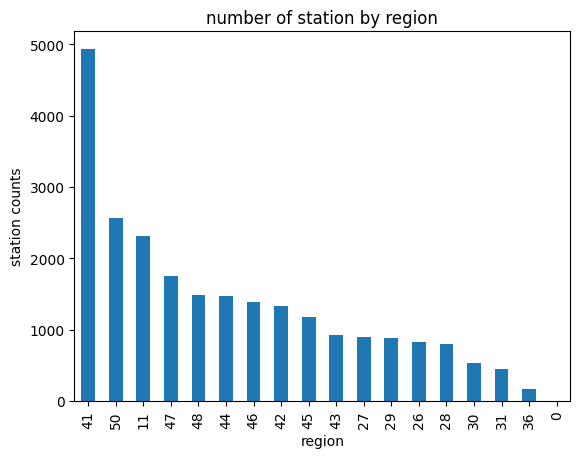

In [16]:
# 지역별 충전소 현황 분석
# 지역별 충전소 집계

import matplotlib.pyplot as plt
region_counts = merged_file['지역코드'].value_counts()

# 막대그래프 시각화
region_counts.plot(kind='bar')
plt.title('number of station by region')
plt.xlabel('region')
plt.ylabel('station counts')
plt.show()


    지역코드         회원가
0      0         NaN
1     11  392.667717
2     26  388.646085
3     27  351.796078
4     28  379.442402
5     29  448.950832
6     30  379.335154
7     31  354.739163
8     36  370.538843
9     41  408.593669
10    42  386.036652
11    43  367.899254
12    44  382.688839
13    45  376.692537
14    46  374.396966
15    47  359.251060
16    48  388.160094
17    50  408.375977


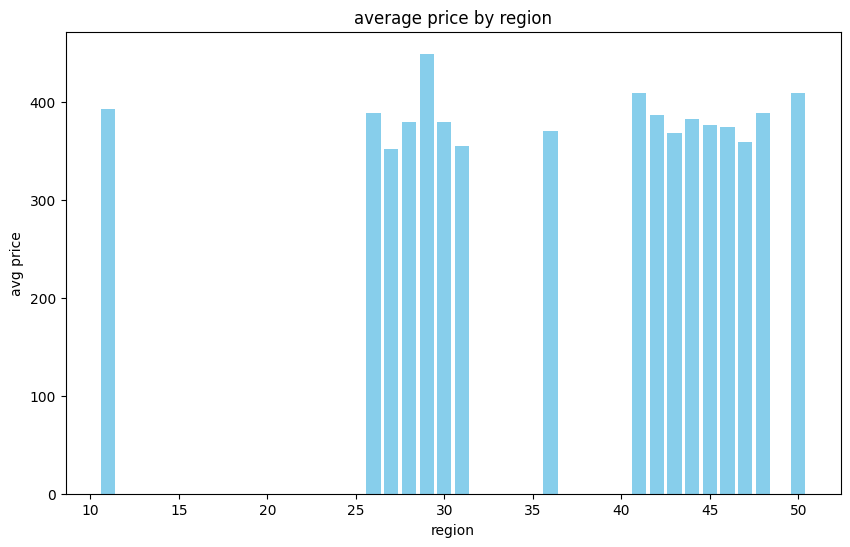

In [24]:
merged_file2 = pd.read_csv('EV_merged.csv')

#지역별 평균 가격

avg_price_region = merged_file2.groupby('지역코드')['회원가'].mean().reset_index()

print(avg_price_region)

# 시각화 (바 차트)
plt.figure(figsize=(10, 6))
plt.bar(avg_price_region['지역코드'], avg_price_region['회원가'], color='skyblue')
plt.xlabel('region')
plt.ylabel('avg price')
plt.title('average price by region')
# plt.xticks(rotation=45)  # 지역코드 라벨이 겹치지 않도록 회전
# plt.tight_layout()

plt.show()


In [ ]:
# 시간에 따른 유가 변화 분석

df['날짜'] = pd.to_datetime(df['날짜'])
df.set_index('날짜')['휘발유_가격'].plot()
plt.title('시간에 따른 휘발유 가격 변화')
plt.xlabel('날짜')
plt.ylabel('가격 (원)')
plt.show()
